## Numpy

In [1]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [2]:
import random
def array1():
  array=[]
  for i in range(10000):
    array.append(random.random()+1)
  return array

def array2():
  return (np.random.rand(10000) +1)

In [3]:
%%timeit
array1()

2.11 ms ± 656 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%%timeit
array2()

108 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [6]:
from math import sin, cos
def sincos1(arr):
  array=[]
  for a in arr:
    array.append(sin(a) + cos(a))
  return array

def sincos2(arr):
  return np.sin(arr) + np.cos(arr)

In [7]:
%%timeit
sincos1(array1())

4 ms ± 95.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit
sincos2(array2())

467 µs ± 4.91 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [9]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [10]:
def cube_sum1(x):
    return np.power(x, 3).sum()

def almost_variance1(x):
    return np.power(x-x.mean(), 4).mean()

In [12]:
%%timeit
cube_sum(array1())

3.3 ms ± 76.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
cube_sum1(array2())

435 µs ± 70 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
almost_variance(array1())

5.08 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
almost_variance1(array2())

736 µs ± 76.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [22]:
print(np.arange(1,11) * np.arange(1,11).reshape(10,1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**?

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [51]:
array = np.random.rand(10,5)
print(array)

def euklides(array):
    return np.sqrt(np.sum((array.reshape(array.shape[0], 1, array.shape[1]) - array) ** 2, axis=2))

print(euklides(array))

[[0.81362822 0.09812006 0.49042787 0.62345793 0.74185017]
 [0.9903101  0.42816848 0.05037662 0.66829906 0.41352567]
 [0.55196989 0.70713301 0.41931041 0.17710147 0.63862902]
 [0.71161236 0.85593715 0.46552238 0.88380186 0.69099326]
 [0.45208682 0.49220781 0.99859672 0.64779874 0.69267336]
 [0.56046938 0.37323538 0.00423951 0.05714884 0.70957616]
 [0.63475455 0.42411213 0.90089322 0.78761785 0.93764464]
 [0.10535412 0.831574   0.56094895 0.94342168 0.09452985]
 [0.84062938 0.63326226 0.3503978  0.77432992 0.70314   ]
 [0.28276558 0.09913169 0.75064381 0.23553718 0.91819632]]
[[0.         0.66603397 0.80889322 0.80974048 0.73977277 0.83540683
  0.60994457 1.25139143 0.5753047  0.72877224]
 [0.66603397 0.         0.83547716 0.74594516 1.1274974  0.80688277
  1.06712341 1.17644294 0.49959933 1.24146442]
 [0.80889322 0.83547716 0.         0.74292084 0.78499605 0.55069579
  0.88375149 1.05749858 0.67407241 0.79592147]
 [0.80974048 0.74594516 0.74292084 0.         0.73452098 1.07346524
  0.67

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix}
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) =
\left [ \begin{matrix}
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [27]:
def white(x):
    return ((x - np.mean(x, axis=0)) / np.std(x, axis=0))

print(white(np.array([[0,1],[2,3],[4,5],[6,7],[8,9]])))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn.

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a|
$$

np.

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [23]:
def closest(x, a):
    return a[np.argmin(np.abs(a - x))]

closest(1.5, np.array([1,-4, 3]))

1

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`).
Może Ci się przydać metoda `cumprod`.

In [41]:
def poly(x, a):
    return np.power(np.repeat(x, len(a)), np.arange(0, len(a))).sum()

print(poly(2, [1, 2, 3, 4, 5, 6, 7, 8, 9]))

511


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

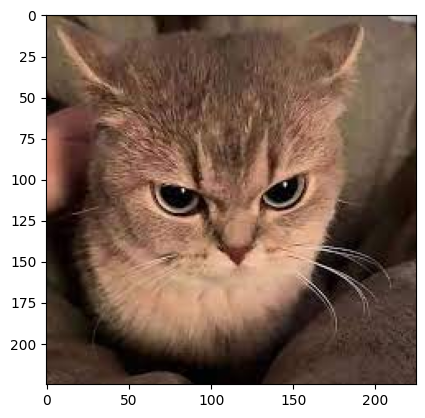

In [54]:
img = mpimg.imread('cat.jpg')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

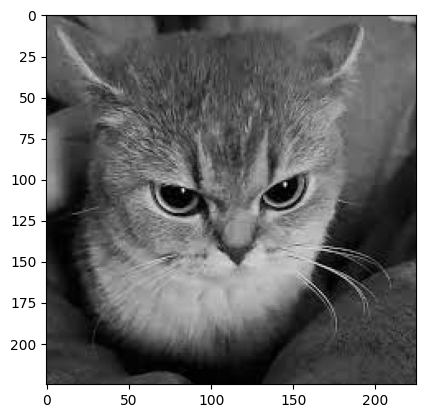

In [61]:
def gray(img):
  R = np.array(img[:, :, 0])
  G = np.array(img[:, :, 1])
  B = np.array(img[:, :, 2])
  return 0.2126 * R + 0.7152 * G + 0.0722 * B

img1 = gray(img)
plt.imshow(img1, cmap=('gray'))

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [64]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([6, 7, 8, 9, 10])
l = np.linspace(0, 1, 10).reshape(10, 1)
print(l * x1 + (1 - l) * x2)

[[ 6.          7.          8.          9.         10.        ]
 [ 5.44444444  6.44444444  7.44444444  8.44444444  9.44444444]
 [ 4.88888889  5.88888889  6.88888889  7.88888889  8.88888889]
 [ 4.33333333  5.33333333  6.33333333  7.33333333  8.33333333]
 [ 3.77777778  4.77777778  5.77777778  6.77777778  7.77777778]
 [ 3.22222222  4.22222222  5.22222222  6.22222222  7.22222222]
 [ 2.66666667  3.66666667  4.66666667  5.66666667  6.66666667]
 [ 2.11111111  3.11111111  4.11111111  5.11111111  6.11111111]
 [ 1.55555556  2.55555556  3.55555556  4.55555556  5.55555556]
 [ 1.          2.          3.          4.          5.        ]]
